<a href="https://colab.research.google.com/github/Madhav2204/LGMVIP-DataScience/blob/main/Task_1_Iris_Flowers_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Madhav Shrivastava

### TASK 1:Iris Flowers Classification ML Project 

##### Problem Statement :This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Dataset link : http://archive.ics.uci.edu/ml/datasets/Iris

#### Step-1 : Lets First import required liberies

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('./Datasets/iris.csv')
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.tail(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
140,6.7,3.1,5.6,2.4,Virginica
141,6.9,3.1,5.1,2.3,Virginica
142,5.8,2.7,5.1,1.9,Virginica
143,6.8,3.2,5.9,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
df.sample(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
28,5.2,3.4,1.4,0.2,Setosa
100,6.3,3.3,6.0,2.5,Virginica
7,5.0,3.4,1.5,0.2,Setosa
44,5.1,3.8,1.9,0.4,Setosa
79,5.7,2.6,3.5,1.0,Versicolor
125,7.2,3.2,6.0,1.8,Virginica
131,7.9,3.8,6.4,2.0,Virginica
96,5.7,2.9,4.2,1.3,Versicolor
16,5.4,3.9,1.3,0.4,Setosa
15,5.7,4.4,1.5,0.4,Setosa


In [ ]:
df["variety"].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
df.nunique()

sepal.length    35
sepal.width     23
petal.length    43
petal.width     22
variety          3
dtype: int64

In [ ]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
df = df.rename(columns = {'sepal.length': 'sepal_length', 'petal.length': 'petal_length', 'sepal.width': 'sepal_width' , 'petal.width': 'petal_width', 'variety' : 'Species'})
print(df)

     sepal_length  sepal_width  petal_length  petal_width    Species
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


#### Lets Visualize the input data

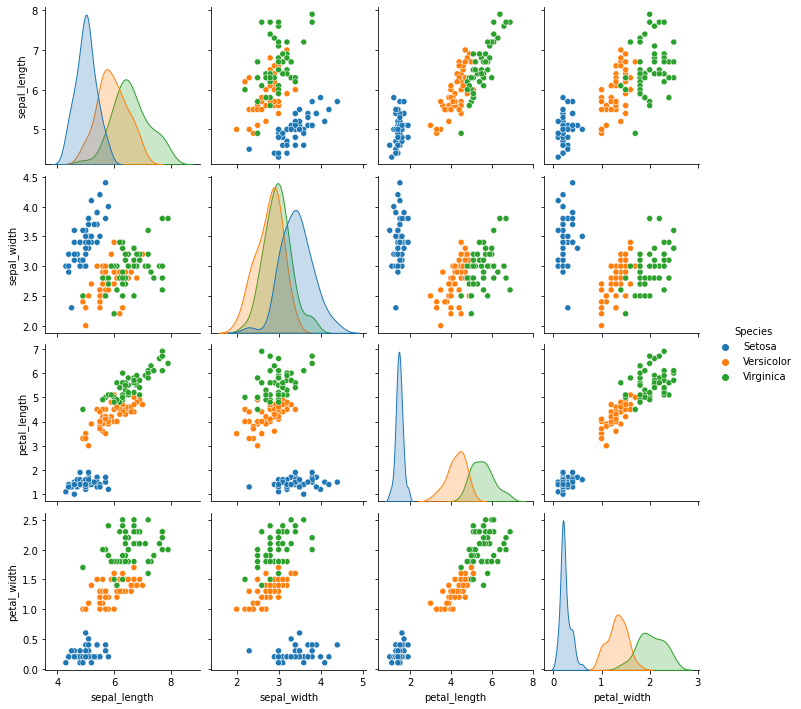

In [ ]:
sns.pairplot(df, hue = "Species")
plt.show()

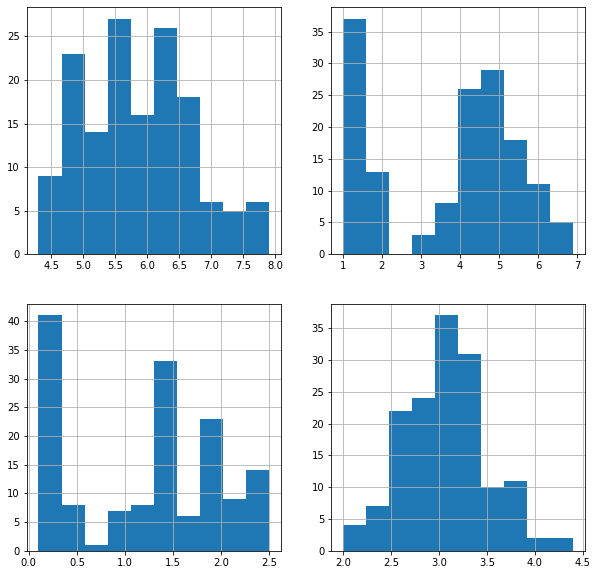

In [ ]:
def histplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    df['sepal_length'].hist(ax=axes[0][0])
    df['petal_length'].hist(ax=axes[0][1])
    df['petal_width'].hist(ax=axes[1][0])
    df['sepal_width'].hist(ax=axes[1][1])
    plt.show()
    
histplots()

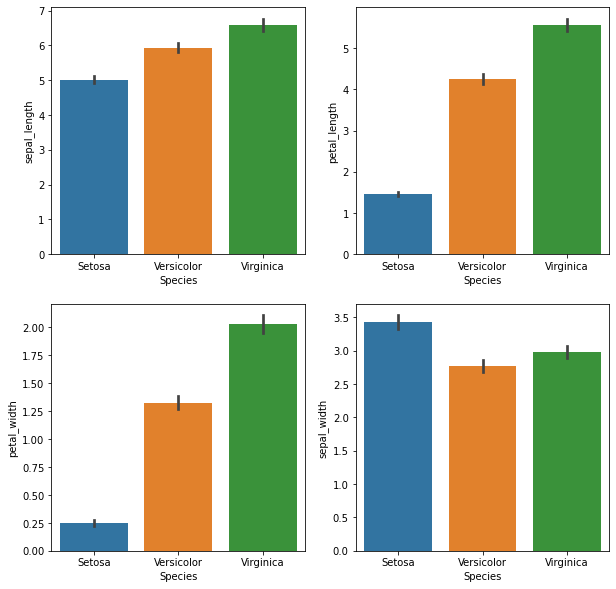

In [ ]:
def barplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    sns.barplot(x=df.Species,y=df['sepal_length'],ax=axes[0][0])
    sns.barplot(x=df.Species,y=df['petal_length'],ax=axes[0][1])
    sns.barplot(x=df.Species,y=df['petal_width'],ax=axes[1][0])
    sns.barplot(x=df.Species,y=df['sepal_width'],ax=axes[1][1])
    plt.show()
    
barplots()

#### Correlation

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

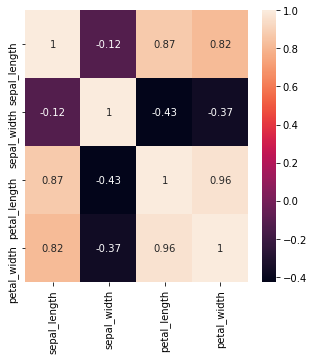

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)

In [ ]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,Species
89,5.5,2.5,4.0,1.3,1
53,5.5,2.3,4.0,1.3,1
66,5.6,3.0,4.5,1.5,1
146,6.3,2.5,5.0,1.9,2
13,4.3,3.0,1.1,0.1,0
46,5.1,3.8,1.6,0.2,0
99,5.7,2.8,4.1,1.3,1
127,6.1,3.0,4.9,1.8,2
142,5.8,2.7,5.1,1.9,2
48,5.3,3.7,1.5,0.2,0


In [ ]:
x = df.iloc[:,:4].values
y = df.iloc[:,4].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Supervised ML Algorithms

In [ ]:
print('-------------------------------------- LINEAR REGRESSION ----------------------------------------------')

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
sc_lr = round(model.score(x_test, y_test) * 100 , 2)
print("Accuracy: ", str(sc_lr) , " %" )

-------------------------------------- LINEAR REGRESSION ----------------------------------------------
Accuracy:  91.89  %


In [ ]:
print('-------------------------------------- LOGISTIC REGRESSION ----------------------------------------------')

model2 = LogisticRegression()
model2.fit(x_train,y_train)
sc_logr = round(model2.score(x_test, y_test) * 100,2)
print("Accuracy: ", str(sc_logr) ,  " %")

-------------------------------------- LOGISTIC REGRESSION ----------------------------------------------
Accuracy:  100.0  %


C:\Users\Madhavshrivastava\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('-------------------------------------- NAIVE BAYES ----------------------------------------------')

nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
print("Accuracy: "+str(score_nb)+" %")
print(classification_report(y_test, y_pred_nb))

-------------------------------------- NAIVE BAYES ----------------------------------------------
Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
print('--------------------------------------KNN CLASSIFIER -----------------------------------------------')

model3 = KNeighborsClassifier()
model3.fit(x_train,y_train)
sc_knn = round(model3.score(x_test, y_test) * 100,2)
print("Accuracy: ", str(sc_knn) , " %")

--------------------------------------KNN CLASSIFIER -----------------------------------------------
Accuracy:  97.78  %


In [ ]:
print('--------------------------------------DECISION TREE CLASSIFIER------------------------------------------------')
model4 = DecisionTreeClassifier()
model4.fit(x_train, y_train)
sc_dt= round(model4.score(x_test, y_test) * 100 , 2)
print("Accuracy: ", str(sc_dt) , "%")

--------------------------------------DECISION TREE CLASSIFIER------------------------------------------------
Accuracy:  97.78 %


In [ ]:
print('--------------------------------------SVM ------------------------------------------------')

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
y_pred_svm = sv.predict(x_test)
sc_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)
print("Accuracy: "+ str(sc_svm) +" %")
print(classification_report(y_test, y_pred_svm))

--------------------------------------SVM ------------------------------------------------
Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Comparison

C:\Users\Madhavshrivastava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


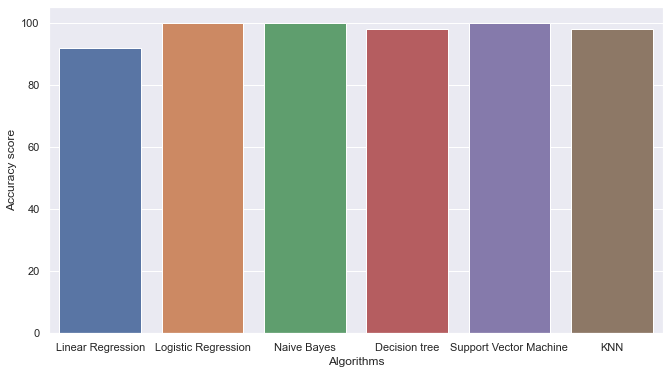

In [ ]:
scores_plt = [sc_lr , sc_logr , score_nb, sc_dt, sc_svm, sc_knn]
algorithms = ["Linear Regression","Logistic Regression","Naive Bayes","Decision tree","Support Vector Machine", "KNN"]
sns.set(rc={'figure.figsize':(11,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores_plt)
plt.show()